In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.io import fits
from flareTools import id_segments

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/gj1243/'

In [74]:
GJ1243_lum = 30
GJ1243_TIC = 273589987

Compare flare pipeline results with Lupita's working picking out flares by eye from GJ1243.

In [2]:
param_table = pd.read_csv(path + 'log/gj1243_param_out.csv')
flare_table = pd.read_csv(path + 'log/gj1243_flare_out.csv')

In [3]:
# Flare events found by eye by Lupita
fbeye14 = pd.read_csv('gj1243_tess14.dat.fbeye',delim_whitespace=True,comment='#',names = ['Event_ID', 'Start_INDX', 'Stop_INDX', 't_peak', 't_start', 't_stop', 't_rise', 't_decay', 
            'Flux_peak', 'Equiv_Dur', 'S/N', 'CPLX_flg', 'MLTPK_flg', 'MLTPK_num', 't_MLTPK', 'L_mltpk', 
            'MLTPK_INDX', 'quies','x'])[1:]
t_starts = fbeye14.loc[:,'t_start'].values
t_stops = fbeye14.loc[:,'t_stop'].values
flux_peak = fbeye14.loc[:,'Flux_peak'].values
ed_eye = fbeye14.loc[:,'Equiv_Dur'].values
sn_eye = fbeye14.loc[:,'S/N'].values

fbeye15 = pd.read_csv('gj1243_tess15.dat.fbeye',delim_whitespace=True,comment='#',names = ['Event_ID', 'Start_INDX', 'Stop_INDX', 't_peak', 't_start', 't_stop', 't_rise', 't_decay', 
            'Flux_peak', 'Equiv_Dur', 'S/N', 'CPLX_flg', 'MLTPK_flg', 'MLTPK_num', 't_MLTPK', 'L_mltpk', 
            'MLTPK_INDX', 'quies','x'])[1:]
t_starts = np.append(t_starts, fbeye15.loc[:,'t_start'].values)
t_stops = np.append(t_stops, fbeye15.loc[:,'t_stop'].values)
flux_peak = np.append(flux_peak, fbeye15.loc[:,'Flux_peak'].values)
ed_eye = np.append(ed_eye, fbeye15.loc[:,'Equiv_Dur'].values)
sn_eye = np.append(sn_eye, fbeye15.loc[:,'S/N'].values)

In [18]:
# Flare events found by my pipeline

tstart = flare_table[flare_table['file'] == file1]['t0'].values
tstop = flare_table[flare_table['file'] == file1]['t1'].values
tstart = np.append(tstart, flare_table[flare_table['file'] == file2]['t0'].values)
tstop = np.append(tstop, flare_table[flare_table['file'] == file2]['t1'].values)

/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in less_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in less_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in less_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anac

Text(0, 0.5, 'Normalized Flux')

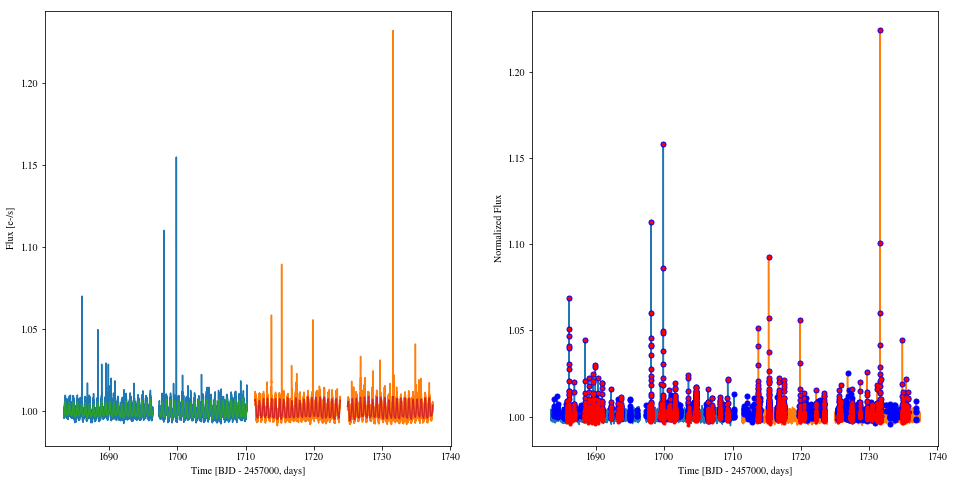

In [19]:
fig, axes = plt.subplots(figsize=(16,8), nrows=1, ncols=2)

file1 = param_table.iloc[0]['file']
with fits.open(path+file1, mode='readonly') as hdulist:
        tess_bjd1 = hdulist[1].data['TIME']
        pdcsap_flux1 = hdulist[1].data['PDCSAP_FLUX']
        pdcsap_flux_error1 = hdulist[1].data['PDCSAP_FLUX_ERR']
        quality1 = hdulist[1].data['QUALITY']      
times1, smo1, var1 = np.loadtxt(path+'/gp/'+file1+'.gp')
smo_int1 = np.interp(tess_bjd1, times1, smo1)
ok_cut1 = (quality1 == 0) & (~np.isnan(tess_bjd1)) & (~np.isnan(pdcsap_flux1)) & \
        (~np.isnan(pdcsap_flux_error1))
median1 = np.nanmedian(pdcsap_flux1)

file2 = param_table.iloc[1]['file']
with fits.open(path+file2, mode='readonly') as hdulist:
        tess_bjd2 = hdulist[1].data['TIME']
        pdcsap_flux2 = hdulist[1].data['PDCSAP_FLUX']
        pdcsap_flux_error2 = hdulist[1].data['PDCSAP_FLUX_ERR']
        quality2 = hdulist[1].data['QUALITY']      
times2, smo2, var2 = np.loadtxt(path+'/gp/'+file2+'.gp')
smo_int2 = np.interp(tess_bjd2, times2, smo2)
ok_cut2 = (quality2 == 0) & (~np.isnan(tess_bjd2)) & (~np.isnan(pdcsap_flux2)) & \
        (~np.isnan(pdcsap_flux_error2))
median2 = np.nanmedian(pdcsap_flux2)

axes[0].plot(tess_bjd1, pdcsap_flux1/median1)
axes[0].plot(tess_bjd2, pdcsap_flux2/median2)
axes[0].plot(tess_bjd1, smo_int1)
axes[0].plot(tess_bjd2, smo_int2)
axes[0].set_xlabel('Time [BJD - 2457000, days]')
axes[0].set_ylabel('Flux [e-/s]')

x1 = tess_bjd1
y1 = pdcsap_flux1/median1 - smo_int1 + 1
axes[1].plot(x1, y1)

x2 = tess_bjd2
y2 = pdcsap_flux2/median2 - smo_int2 + 1
axes[1].plot(x2, y2)

for idx in range(len((t_starts))):
    indices1 = np.where((x1 >= t_starts[idx]) & (x1 <= t_stops[idx]))[0]
    axes[1].plot(x1[indices1], y1[indices1], 'o', color='b', markersize=5)
    indices2 = np.where((x2 >= t_starts[idx]) & (x2 <= t_stops[idx]))[0]
    axes[1].plot(x2[indices2], y2[indices2], 'o', color='b', markersize=5)
for idx in range(len((tstart))):
    indices1 = np.where((x1 >= tstart[idx]) & (x1 <= tstop[idx]))[0]
    axes[1].plot(x1[indices1], y1[indices1], 'o', color='r', markersize=3)
    indices2 = np.where((x2 >= tstart[idx]) & (x2 <= tstop[idx]))[0]
    axes[1].plot(x2[indices2], y2[indices2], 'o', color='r', markersize=3)
    
axes[1].set_xlabel('Time [BJD - 2457000, days]')
axes[1].set_ylabel('Normalized Flux')

In [23]:
med_flux_err = np.nanmedian(pdcsap_flux_error1)/median1
tess_time = (np.nanmedian(np.diff(tess_bjd1))) * (len(tess_bjd1))

# From Davenport 2016
lum = 10**30.352907 

# CPA doesnt usually identify the whole flare, these duration measurements are probably
# too small
# Scaling up ALL durations makes the FFD steeper
dur = ((tstop-tstart)*u.day).to(u.s).value
ed = (flare_table['ed'].values*u.day).to(u.s).value

sn = ed / np.sqrt(ed + (med_flux_err * dur))

energy = (ed*lum*u.erg/u.s).value
energy_eye = (ed_eye*lum*u.erg/u.s).value

Text(0, 0.5, 'dn/de')

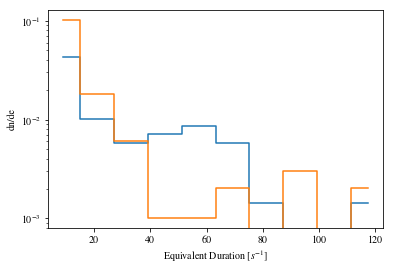

In [24]:
hist_ed, bins_ed = np.histogram(ed, density=True)
bins_ed = 0.5*(bins_ed[1:] + bins_ed[:-1])
hist_ed_eye, bins_ed_eye = np.histogram(ed_eye, density=True)
bins_ed_eye = 0.5*(bins_ed_eye[1:] + bins_ed_eye[:-1])
plt.plot(bins_ed, hist_ed, linestyle='steps-mid')
plt.plot(bins_ed, hist_ed_eye, linestyle='steps-mid')
plt.yscale('log')
plt.xlabel('Equivalent Duration [$s^{-1}$]')
plt.ylabel('dn/de')

Text(0, 0.5, 'dn/dsn')

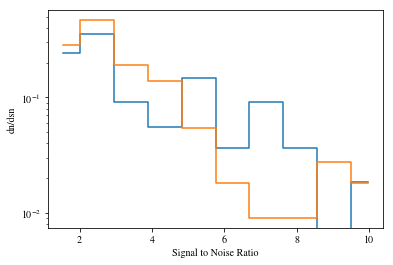

In [25]:
hist_ed, bins_ed = np.histogram(sn, density=True)
bins_ed = 0.5*(bins_ed[1:] + bins_ed[:-1])
hist_ed_eye, bins_ed_eye = np.histogram(sn_eye, density=True)
bins_ed_eye = 0.5*(bins_ed_eye[1:] + bins_ed_eye[:-1])
plt.plot(bins_ed, hist_ed, linestyle='steps-mid')
plt.plot(bins_ed, hist_ed_eye, linestyle='steps-mid')
plt.yscale('log')
plt.xlabel('Signal to Noise Ratio')
plt.ylabel('dn/dsn')

In [26]:
# Improved poisson error
def Perror(n):
    err_down = n * (1. - 1. / (9. * n) -1./(3. * np.sqrt(n)))**3 - n
    err_up = n + np.sqrt(n + 0.75) + 1.0 - n 
    return err_down, err_up

In [27]:
# Flare energies from Davenport 2014
kep_Lo = 30.037849     #Jim calculated this value long time ago
kep_Lo = np.log10(lum) # Use the same Lo I got for consistency

kep_lc = pd.read_csv('https://raw.githubusercontent.com/jradavenport/GJ1243-Flares/1732d4130daf663532596749d566d8f78be8f7b2/data/gj1243_master_slc.dat', delim_whitespace=True, skiprows=1, 
                       names=('time', 'flux', 'error', 'detrended_flux'))
kep_dur = len(kep_lc) * 58.0 / 60./60./24.

kep_flare_table=pd.read_csv('https://raw.githubusercontent.com/jradavenport/GJ1243-Flares/master/data/gj1243_master_flares.tbl',
            skiprows=23,delim_whitespace=True,names=['index of flare start in "gj1243_master_slc.dat"',
                                                   'index of flare stop in "gj1243_master_slc.dat"','t_start','t_stop'
                                                   ,'t_peak','t_rise','t_decay','flux peak',
                                                   'ED','Duration of rise',
                                                   'Duration of decay','Complex flag',
                                                   '# of people that identified flare event exists',
                                                   '# of people that analyzed this month',
                                                   '# of flare template components fit to event'])
kep_sort = np.argsort(kep_flare_table['ED'].values)[::-1]
kep_ED = kep_flare_table['ED'].values[kep_sort]
kep_starts = kep_flare_table['t_start'].values[kep_sort]
kep_stops = kep_flare_table['t_stop'].values[kep_sort]
kep_time=np.nanmedian(np.diff(kep_lc['time'])) * (len(kep_lc['time']))

kep_x = np.log10(kep_ED) + kep_Lo
kep_y = np.log10(np.arange(1, len(kep_x)+1) / kep_time)

kep_nu = (np.arange(1, len(kep_ED)+1)) / kep_time

/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10


In [28]:
flux_err_kep= kep_lc['error']/np.nanmedian(kep_lc['flux'])
kep_sn = kep_ED / np.sqrt(kep_ED + (np.nanmedian(flux_err_kep) * kep_dur))

kep_x_err = 1/np.log(10)/kep_sn/np.log10(kep_ED)
_, perror = Perror(10**kep_y*kep_time)/kep_time
kep_y_err = 1/np.log(10)*perror/10**kep_y
#kep_y_err = 1/np.log(10)*np.sqrt(10**kep_y)/10**kep_y

#_,kep_nu_err = Perror(kep_nu * kep_time) / kep_time
#kep_log_yerr = np.abs((kep_nu_err)/(kep_nu*np.log(10)))

/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


Text(0, 0.5, 'log Cum. Flare Freq (#/day)')

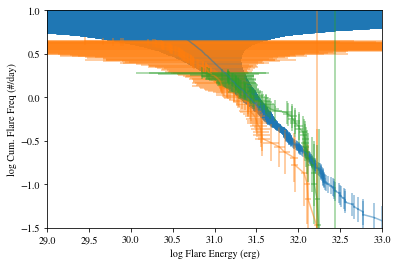

In [29]:
eye_sort = np.argsort(ed_eye)
energy_eye_sort = energy_eye[eye_sort]
sn_eye_sort = sn_eye[eye_sort]
x_vals_eye = energy_eye_sort
log_x_vals_eye = np.log10(x_vals_eye)
y_vals_eye = np.arange(0.001, len(energy_eye))[::-1]/30
log_y_vals_eye = np.log10(y_vals_eye)
log_x_err_eye = 1/np.log(10)/sn_eye_sort/np.log10(ed_eye[eye_sort])
_, perror = Perror(10**log_y_vals_eye*tess_time)/tess_time
log_y_err_eye = 1/np.log(10)*perror/y_vals_eye

ed_sort = np.argsort(ed)
energy_sort = energy[ed_sort]
sn_sort = sn[ed_sort]
x_vals = energy_sort
log_x_vals = np.log10(x_vals)
y_vals = np.arange(0.001, len(energy))[::-1]/30
log_y_vals = np.log10(y_vals)
log_x_err = 1/np.log(10)/sn_sort/np.log10(ed[ed_sort])
_, perror = Perror(10**log_y_vals*tess_time)/tess_time
log_y_err = 1/np.log(10)*perror/y_vals

plt.errorbar(kep_x, kep_y, xerr=kep_x_err, yerr=kep_y_err, alpha=0.5)
plt.errorbar(log_x_vals_eye, log_y_vals_eye, xerr=log_x_err_eye, yerr=log_y_err_eye, alpha=0.5)
plt.errorbar(log_x_vals, log_y_vals, xerr=log_x_err, yerr=log_y_err, alpha=0.5)
plt.xlim(29, 33)
plt.ylim(-1.5, 1)
plt.xlabel('log Flare Energy (erg)')
plt.ylabel('log Cum. Flare Freq (#/day)')

In [30]:
# Since the x values have errors on them, use ODR to fit a line to the log-log data
from scipy.odr import *

def f(B, x):
    return B[0]*x + B[1]

b00, b10 = -0.5, 10

mask = log_x_vals > 0#31.7

linear = Model(f)
mydata = Data(log_x_vals[mask], log_y_vals[mask], wd=1/log_x_err[mask]**2, we=1/log_y_err[mask]**2)
myodr = ODR(mydata, linear, beta0=[b00, b10])
myoutput = myodr.run()
b0, b1 = myoutput.beta[0], myoutput.beta[1]
b0_err, b1_err = myoutput.sd_beta[0], myoutput.sd_beta[1]

mydata = Data(log_x_vals_eye, log_y_vals_eye, wd=1/log_x_err_eye**2, we=1/log_y_err_eye**2)
myodr = ODR(mydata, linear, beta0=[b00, b10])
myoutput = myodr.run()
b0_eye, b1_eye = myoutput.beta[0], myoutput.beta[1]
b0_err_eye, b1_err_eye = myoutput.sd_beta[0], myoutput.sd_beta[1]

mask = np.isfinite(kep_x)
mydata = Data(kep_x[mask], kep_y[mask], wd=1/kep_x_err[mask]**2, we=1/kep_y_err[mask]**2)
myodr = ODR(mydata, linear, beta0=[b00, b10])
myoutput = myodr.run()
b0_kep, b1_kep = myoutput.beta[0], myoutput.beta[1]
b0_err_kep, b1_err_kep = myoutput.sd_beta[0], myoutput.sd_beta[1]

print(str(b0) + ' +/- ' + str(b0_err))
print(str(b0_eye) + ' +/- ' + str(b0_err_eye))
print(str(b0_kep) + ' +/- ' + str(b0_err_kep))

-0.7331620129844048 +/- 0.03226934747674259
-1.050485042725698 +/- 0.021098230397935906
-0.9192477617681446 +/- 0.0016459450861333869


Text(0, 0.5, 'log Cum. Flare Freq (#/day)')

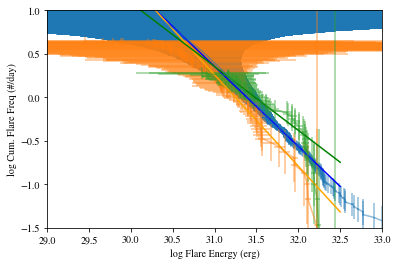

In [31]:
x_model = np.linspace(30, 32.5)
y_model = b0*x_model + b1
y_model_eye = b0_eye*x_model + b1_eye
y_model_kep = b0_kep*x_model + b1_kep

plt.errorbar(kep_x, kep_y, xerr=kep_x_err, yerr=kep_y_err, alpha=0.5)
plt.errorbar(log_x_vals_eye, log_y_vals_eye, xerr=log_x_err_eye, yerr=log_y_err_eye, alpha=0.5)
plt.errorbar(log_x_vals, log_y_vals, xerr=log_x_err, yerr=log_y_err, alpha=0.5)
plt.plot(x_model, y_model_kep, color='blue')
plt.plot(x_model, y_model_eye, color='orange')
plt.plot(x_model, y_model, color='green')
plt.xlim(29, 33)
plt.ylim(-1.5, 1)
plt.xlabel('log Flare Energy (erg)')
plt.ylabel('log Cum. Flare Freq (#/day)')

(-2, 1)

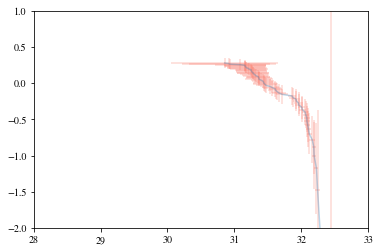

In [32]:
plt.errorbar(log_x_vals, log_y_vals, xerr=log_x_err, yerr=log_y_err, alpha=0.3, ecolor='salmon')
plt.xlim(28,33)
plt.ylim(-2, 1)

(-2, 1)

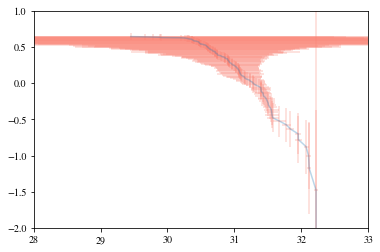

In [33]:
plt.errorbar(log_x_vals_eye, log_y_vals_eye, xerr=log_x_err_eye, yerr=log_y_err_eye, alpha=0.3, ecolor='salmon')
plt.xlim(28,33)
plt.ylim(-2, 1)

(-2, 1.5)

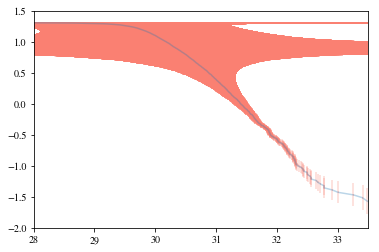

In [34]:
plt.errorbar(kep_x, kep_y, xerr=kep_x_err, yerr=kep_y_err, alpha=0.3, ecolor='salmon')
plt.xlim(28,33.5)
plt.ylim(-2,1.5)